

Duplicate Rows : 
                           Email Address                   Name  \
141  f20220926@pilani.bits-pilani.ac.in     Vikhyat Bharadwaj    
339  f20230242@pilani.bits-pilani.ac.in         Devesh saraogi   
229  f20221257@pilani.bits-pilani.ac.in        Divyanshi Gupta   
76   f20220438@pilani.bits-pilani.ac.in           Divyansh Jha   
108  f20220709@pilani.bits-pilani.ac.in        Vinayak Saxena    
127  f20220823@pilani.bits-pilani.ac.in           Dainik gour    
69   f20220376@pilani.bits-pilani.ac.in          Shubham singh   
364  f20230310@pilani.bits-pilani.ac.in     Shreyas Chaudhari    
208  f20221187@pilani.bits-pilani.ac.in  Harsimar Singh Saluja   
86   f20220548@pilani.bits-pilani.ac.in            Dhruv Bhatt   
531  f20230705@pilani.bits-pilani.ac.in        Namish Baranwal   
371  f20230340@pilani.bits-pilani.ac.in       Manas Dangayach    
185  f20221107@pilani.bits-pilani.ac.in        Unnati saraswat   
481  f20230582@pilani.bits-pilani.ac.in          Aaryan

C:\Users\SAARTH CHAHAL\AppData\Local\Temp\ipykernel_4140\1387385334.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rem_Dup_Rows['BITS ID'] = remove_items_with_condition(Rem_Dup_Rows['BITS ID'], keep_condition )
C:\Users\SAARTH CHAHAL\AppData\Local\Temp\ipykernel_4140\1387385334.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rem_Dup_Rows['BITS ID'] = replace_nan_with_valid_id(Rem_Dup_Rows['BITS ID'])


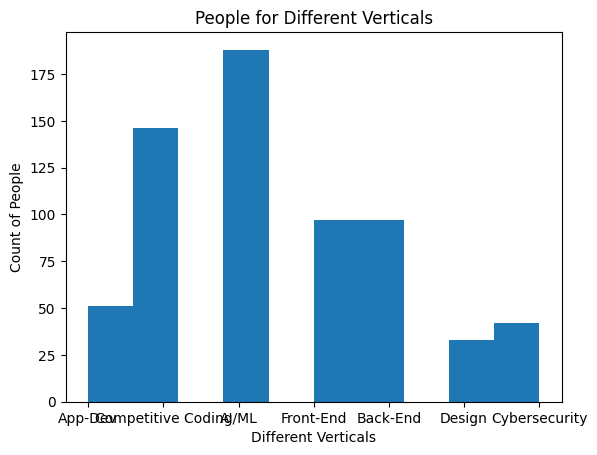

C:\Users\SAARTH CHAHAL\AppData\Local\Temp\ipykernel_4140\1387385334.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rem_Dup_Rows['Year'] = Rem_Dup_Rows['Email Address'].apply(extract_substring)


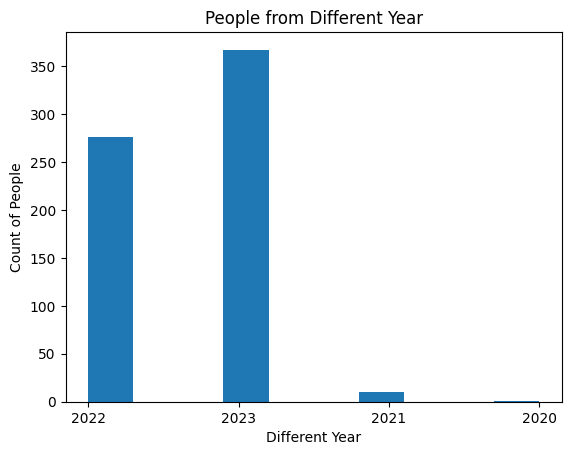

DataFrame saved as 'C:\Users\SAARTH CHAHAL\Documents\GitHub\GDSC-AIML\Task2\Applicants.csv'
Category 'App-Dev' saved as 'App-Dev.csv' in 'category_csv_files' directory.
Category 'Competitive Coding' saved as 'Competitive Coding.csv' in 'category_csv_files' directory.
Category 'AI-ML' saved as 'AI-ML.csv' in 'category_csv_files' directory.
Category 'Front-End' saved as 'Front-End.csv' in 'category_csv_files' directory.
Category 'Back-End' saved as 'Back-End.csv' in 'category_csv_files' directory.
Category 'Design' saved as 'Design.csv' in 'category_csv_files' directory.
Category 'Cybersecurity' saved as 'Cybersecurity.csv' in 'category_csv_files' directory.


C:\Users\SAARTH CHAHAL\AppData\Local\Temp\ipykernel_4140\1387385334.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rem_Dup_Rows['Vertical you wish to apply for'] = Rem_Dup_Rows['Vertical you wish to apply for'].str.replace(old_character, new_character)


In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline 

# read the datafile using panda library.  ensure right file location on machine. 
data = pd.read_csv(r"C:\Users\SAARTH CHAHAL\Downloads\GDSC Recruitment Form (Pandas Task Copy) - Form Responses 1 (1).csv") 

# first complete task 2. Order applicants in chronological order of submission of form.    
# by default the timestamp is set in ascending order, whoever submitted form later will have a larger timestamp 
data_sort = data.sort_values(by =['Timestamp']) 

# task1: remove duplicates (a lot of people have applied twice) but at different timestamp. 
# hence full record will always be unique. so drop time stamp ( first cloumn) from dataset to inetify duplicates

withoutTS_data=data_sort.drop('Timestamp',axis=1) 
Dup_Rows = withoutTS_data[withoutTS_data.duplicated()] 
print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))  
Rem_Dup_Rows = withoutTS_data.drop_duplicates(keep='first') 

# task 3. Fix some people have written slightly incorrect IDs

# Function to remove specific items in a column
def remove_items_with_condition(column, condition): 
       return column[~column.apply(lambda x: condition(x))]

# explaination of the  ~column.apply(lambda x: condition(x)) return a boolean mask 
# column: This represents the pandas Series that you want to filter. In your previous code, it was used to filter the 'Column1' of your DataFrame.
# .apply(lambda x: condition(x)): The apply method is used to apply a function to each element of the Series. In this case, a lambda function is applied to each element (x) of the Series.
# lambda x: condition(x): This lambda function takes an element x as input and applies the condition function to it. 
# The condition function is the one you've defined to check whether an element should be kept or removed based on certain criteria
# ~column.apply(lambda x: condition(x)) negates each element in the boolean Series, effectively flipping True values to False and vice versa. 

# Define the condition to keep items
def keep_condition(x):
    return  ('@' in str(x) or not((str(x)[0].isnumeric()) ))

# Function to replace 'NaN' with 'N_validID'
def replace_nan_with_valid_id(column):
    return column.fillna('N_validID') 

# Remove items in 'Column1' that contain '@' or do not start with a number
Rem_Dup_Rows['BITS ID'] = remove_items_with_condition(Rem_Dup_Rows['BITS ID'], keep_condition )

# Replace 'NaN' with 'N_validID'
Rem_Dup_Rows['BITS ID'] = replace_nan_with_valid_id(Rem_Dup_Rows['BITS ID'])

# Task 4. draw matplotlib graphs of people from different verticals and years 

# 4.1 matlib histogram for people different vertical 
plt.hist(Rem_Dup_Rows['Vertical you wish to apply for'])
plt.xlabel("Different Verticals")
plt.ylabel("Count of People")
plt.title("People for Different Verticals")
plt.show() 

# 4.2 matlib histogram for people from different years. 
# add a new column by extract_substring function , which takes a text input and returns the substring starting from 
# the second character (index 1)  upto the fifth character (index 4) to extract year from emails. 

# Function to extract a substring from the second to fifth character
def extract_substring(text):
    if len(text) >= 5:
        return text[1:5]
    else:
        return None  # Return None for strings shorter than 5 characters

# Create a new column by applying the extract_substring function to the original column
# We create a new column 'NewColumn' by applying the extract_substring function to the 'OriginalColumn' 
# using the apply method. This extracts the desired substrings and adds them to the new column.

Rem_Dup_Rows['Year'] = Rem_Dup_Rows['Email Address'].apply(extract_substring) 
plt.hist(Rem_Dup_Rows['Year']) 
plt.xlabel("Different Year")
plt.ylabel("Count of People")
plt.title("People from Different Year")
plt.show()

# Task 5.  save the data as applicants.csv 

import os 

# Specify the desired file path 
file_path = r"C:\Users\SAARTH CHAHAL\Documents\GitHub\GDSC-AIML\Task2\Applicants.csv"  # Replace with your desired file path

# Save the DataFrame to the specified CSV file path
Rem_Dup_Rows.to_csv(file_path, index=False)

print(f"DataFrame saved as '{file_path}'")

# Task 6. Segregate people into different verticals and save this data as aiml.csv, frontend.csv, appd.csv and so on.

# Function to replace 'AI/ML' with 'AI-ML' because /is considered as a path to next Directory
# Specify the column and characters to replace

old_character = '/'
new_character = '-'

# Replace the specified character in the DataFrame
Rem_Dup_Rows['Vertical you wish to apply for'] = Rem_Dup_Rows['Vertical you wish to apply for'].str.replace(old_character, new_character)

df = pd.DataFrame(Rem_Dup_Rows)

# Get unique categories from the 'Category' column
unique_categories = df['Vertical you wish to apply for'].unique()

# Create a directory to store CSV files
output_directory = 'category_csv_files'
os.makedirs(output_directory, exist_ok=True) 

# # Segregate data based on categories and save as CSV files 
for category in unique_categories:   
    category_df = df[df['Vertical you wish to apply for'] == category]    
    file_name = f"{category}.csv"
    file_path = os.path.join(output_directory, file_name)
    category_df.to_csv(file_path, index=False) 
    print(f"Category '{category}' saved as '{file_name}' in '{output_directory}' directory.") 





data